# Como incluir imágenes en un cuaderno Jupyter

[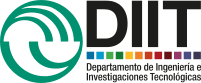](https://ingenieria.unlam.edu.ar/)    
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 
2022 [Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)  

---

## El problema
El archivo `ipynb` de un cuaderno (notebook) a diferencia de un archivo de muchas aplicaciones, e.g. un procesador de texto, no suele incluir las imágenes.
Para mostrar una imágen se suele **enlazar** al correspondiente archivo sea este en formato `png` o `jpeg`.

## Archivo local
- Pro: Es sencillo el código para enlazar un archivo.
Basta con indicar su ubicación respecto al `ipynb` en el sistema de archivos.
- Contras:
    - **No olvidar** adjuntar el archivo junto con el `ipynb`
    - Deben respetarse los nombres de directorios y archivo para que se muestre la imagen.  

Escribiendo en una celda Markdown
```Markdown
![Texto que aparece si no se puede mostrar la imagen](figs/engranajes.png "Texto que aparece al desplazar el puntero sobre la imagen")
```
donde `figs/engranajes.png` es el sendero (path) del archivo en el directorio que le contiene, figuras en este caso.
Se obtiene  
![Texto que aparece si no se puede mostrar la imagen](figs/engranajes.png "Texto que aparece al desplazar el puntero sobre la imagen")

## Archivo en internet
- Pros:
    - No hay que adjuntar nada con el `ipynb`.
    - Es sencillo el código para enlazar un archivo en internet. Solo hay que indicar su `URL`.
- Contras:
    - Requiere conexión a internet para ver la imagen.
    - Previamente hay que subir la imagen a algún sitio.

Escribiendo en una celda Markdown
```Markdown
![Texto que aparece si no se puede mostrar la imagen](https://github.com/unlam/MecanicaAnaliticaComputacional/raw/master/78Informática/figs/engranajes.png "Texto que aparece al desplazar el puntero sobre la imagen")
```
se obtiene  
![Texto que aparece si no se puede mostrar la imagen](https://github.com/unlam/MecanicaAnaliticaComputacional/raw/master/78Informática/figs/engranajes.png "Texto que aparece al desplazar el puntero sobre la imagen")

## Incluir la imagen como texto
Se puede codificar la imagen en un sistema de numeración base 64 dentro del mismo `ipynb`

- Pro:
    - No hay que adjuntar nada con el `ipynb`.
- Contra:
    - Previamente hay que convertir la imagen a un texto en esta codificación.
    
**(Doble clic en la siguiente celda Markdown, la que contiene la imagen, despliega su codificación)**.

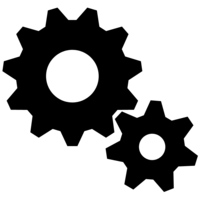

Una explicación de que es esta codicación se da en este extracto del artículo de Wikipedia ["Base64"](https://es.wikipedia.org/wiki/Base64)
> Base 64 es un sistema de numeración posicional que usa 64 como base. Es la mayor potencia que puede ser representada usando únicamente los caracteres imprimibles de ASCII.

> En el lenguaje CSS se puede, literalmente, escribir una imagen en base64 en vez de cargar una imagen desde un servidor.

Extracto del artículo de Wikipedia ["Hoja de estilos en cascada"](https://es.wikipedia.org/wiki/Hoja_de_estilos_en_cascada)
> CSS (siglas en inglés de Cascading Style Sheets), en español «Hojas de estilo en cascada», es un lenguaje de diseño gráfico para definir y crear la presentación de un documento estructurado escrito en un lenguaje de marcado.2​ Es muy usado para establecer el diseño visual de los documentos web, e interfaces de usuario escritas en HTML o XHTML; el lenguaje puede ser aplicado a cualquier documento XML, incluyendo XHTML, SVG, XUL, RSS, etcétera.

El cuaderno (notebook) de ipython `ipynb` es un documento `XML` que se interpreta en un navegador.
En sus celdas `markdown` se puede en vez de incluir una referencia a la ubicación de un archivo de la imagen indicarle que debe interpretar como datos una cadena de caractéres (texto).
La codificación más compacta usando el alfabeto corriente es base64.

### Codificar en ba64 en Google Colaboratory
Es tan sencillo como
1. Ver la imagen en el navegador. Si está en el dispositivo propio ir en el menú a `Archivo` y luego `Abrir`.
2. Clic derecho en la imagen y `copiar`.
3. En el cuaderno en Google Colaboratory crear una celda de texto (`markdown`).
4. Hace clic en la celda para que muestre el cursor
5. Pegar o `ctrl-v`.

### Paso a paso: codificar en base64 manualmente
Adaptado de: https://stackoverflow.com/questions/3715493/encoding-an-image-file-with-base64

Primer paso: indicar ubicación del archivo `png` o `jpeg`.

In [4]:
# ubicación y nombre del archivo de la imagen
imagen_archivo = '../modulos/img/em01_una_carga.png'

Segundo paso: convertir a base64.

''
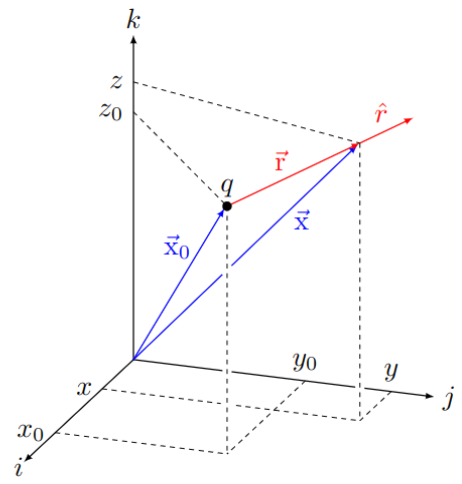

In [5]:
# convierte a base64
import base64
codificado = base64.b64encode(open(imagen_archivo, "rb").read()) # esto lo engloba entre b'<contenido>' 
pegáEsto = '!['+ imagen_archivo+ '](data:image/png;base64,{}'.format(str(codificado)[2:-1]) + ')'
pegáEsto

Tercer paso: Poner lo codificado en una celda `markdown`.

Tras ejecutar la celda anterior en `pegáEsto` hay una cadena de caractéres (`str`) entre comillas.
Hay dos alternativas:
- Copiar en una celda
    1. Escibir en una celda de código `pegáEsto` y ejecutarla.
    2. Copiar la salida de la celda.
    3. Pegarla en una celda `markdown`.
    4. Borrar las comillas simples al principio y final del texto.
    5. Ejecutar la celda para verificar que muestra la imagen.
- Escribir un archivo
    1. Al ejecutar el código de la celda de abajo se genera un archivo con el mismo nombre de aquél de la imagen, pero con la extensión `txt` en el mismo directorio.
    1. Abrir el archivo `txt`.
    1. Copiar todo su contenido
    1. Pegar en una celda `markdown`.

In [3]:
# escribe a un archivo de texto
with open(imagen_archivo[:-3]+'txt', 'w') as f:
    f.write(pegáEsto)